The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-0.001, 0.021, -0.00022500000000000005, 0.021775000000000003)

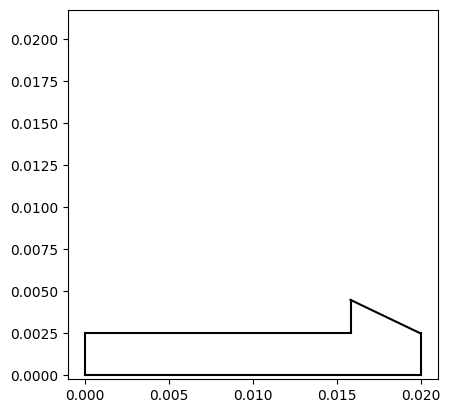

In [12]:
%reset -f
%load_ext autoreload
%autoreload 2

import numpy as np
import sympy as sy
from matplotlib import pyplot as plt

def find_closest_index(array, n, t):
    # Convert array to a NumPy array if it's not already one
    array = np.asarray(array)
    
    # Calculate absolute differences between array elements and target number n
    differences = np.abs(array - n)
    
    # Find indices where the difference is within the threshold t
    within_threshold_indices = np.where(differences <= t)[0]
    
    # If no values are within the threshold, return None
    if len(within_threshold_indices) == 0:
        return None
    
    # Find the index of the minimum difference within the threshold
    closest_index = within_threshold_indices[np.argmin(differences[within_threshold_indices])]
    
    return closest_index

elastic_modulus = 2900e6
width_beam = 0.5e-2
length_beam = 2e-2
height_beam = 0.25e-2
deflection = length_beam * 0.1
friction_coefficient = 0.5
diameter_pin = 5e-2

I_beam = (width_beam * height_beam**3) / 12
angle_in_deg = np.linspace(10,80,1000)
angle_in_rad = np.deg2rad(angle_in_deg)
force_in_desired = (2.26 / diameter_pin) / 2
force_threshold_in = 0.1 * force_in_desired

extra_bit = (friction_coefficient * np.cos(angle_in_rad) + np.sin(angle_in_rad)) / (friction_coefficient * np.sin(angle_in_rad) + np.cos(angle_in_rad))
# extra_bit = (friction_coefficient + np.tan(angle_in_rad))
calculated_force_in = ((3 * elastic_modulus * I_beam) / (length_beam - (deflection / np.tan(angle_in_rad)))**3) * deflection * extra_bit

id_in = find_closest_index(calculated_force_in, force_in_desired, force_threshold_in)
the_force_in = calculated_force_in[id_in]
the_angle_in_deg = angle_in_deg[id_in]
the_angle_in_rad = angle_in_rad[id_in]
force_location = length_beam - deflection / np.tan(the_angle_in_rad)
the_small_angle = deflection / force_location

# # Plotting if desired
# plt.figure()
# plt.plot(angle_in_deg,calculated_force_in,'black')
# # plt.plot(angle_in_deg,calculated_force_out,'red')
# plt.scatter(the_angle_in_deg,the_force_in,c='red')

index = -1
fig, ax = plt.subplots()
# plt.figure()
ax.plot([0,length_beam],[0,0],'black')
ax.plot([0,0],[0,height_beam],'black')
ax.plot([length_beam,length_beam],[0,height_beam],'black')
ax.plot([length_beam,force_location],[height_beam,deflection+height_beam],'black')
ax.plot([0,force_location],[height_beam,height_beam],'black')
ax.plot([force_location,force_location],[height_beam,height_beam+deflection],'black')
# ax.plot([ramp_location[i][0],the_force_location],[height_beam,height_beam+deflection],'black')
ax.axis('square')
